<a href="https://colab.research.google.com/github/ms6373/Mujahid/blob/master/MYMODEL_Copy_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-07-06 03:18:57--  https://www.crcv.ucf.edu/projects/Abnormal_Crowd/Normal_Abnormal_Crowd.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 266608716 (254M) [application/zip]
Saving to: ‘Normal_Abnormal_Crowd.zip’

Normal_Abnormal_Cro 100%[===================>] 254.26M  71.8MB/s    in 3.7s    

2020-07-06 03:19:01 (67.8 MB/s) - ‘Normal_Abnormal_Crowd.zip’ saved [266608716/266608716]



In [4]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!wget https://www.crcv.ucf.edu/projects/Abnormal_Crowd/Normal_Abnormal_Crowd.zip

In [3]:
!unzip '/content/Normal_Abnormal_Crowd.zip'

Archive:  /content/Normal_Abnormal_Crowd.zip
   creating: Normal Crowds/
  inflating: Normal Crowds/341-46_l.mov  
  inflating: Normal Crowds/3687-18_70.mov  
  inflating: Normal Crowds/637-147_l.mov  
  inflating: Normal Crowds/688-10_l.mov  
  inflating: Normal Crowds/81872953_l.mov  
  inflating: Normal Crowds/821-10_l.mov  
  inflating: Normal Crowds/879-38_l.mov  
  inflating: Normal Crowds/9019-13_l.mov  
  inflating: Normal Crowds/906-17_l.mov  
  inflating: Normal Crowds/CRW116.mov  
  inflating: Normal Crowds/sfw20110024_l.mov  
  inflating: Normal Crowds/shibuya1.mov  
   creating: Abnormal Crowds/
  inflating: Abnormal Crowds/1183-88_l.mov  
  inflating: Abnormal Crowds/2010-291_l.avi  
  inflating: Abnormal Crowds/2014-140_l.avi  
  inflating: Abnormal Crowds/2017-420_l.mov  
  inflating: Abnormal Crowds/263C044_060_c.mov  
  inflating: Abnormal Crowds/263C044_064_c.mov  
  inflating: Abnormal Crowds/3452204_031_c.mov  
  inflating: Abnormal Crowds/490-208_l.mov  
  inflati

In [6]:
import os
import cv2
import numpy as np
l = 0
video_folder = '/content/Normal Crowds/'
X_data = []
y_data = []
list_of_videos = os.listdir(video_folder)
for i in list_of_videos:
    # Video Path
    vid = str(video_folder + i)  # path to each video from list1 = os.listdir(path)
    # Reading the Video
    cap = cv2.VideoCapture(vid)
    # Reading Frames
    # fps = vcap.get(5)
    # To Store Frames
    q = 0
    frames = []
    if l % 1 == 0:
         print(l, "/", len(list_of_videos))

    l += 1
    while (cap.isOpened()):

        q += 1
        ret, frame = cap.read()
        if ret == False:
            break
        else:
            frame = cv2.resize(frame, (100, 100), interpolation=cv2.INTER_AREA)
            frames.append(frame)

        if q == 16:
            X_data.append(frames)  # appending each tensor of 40 frames resized to 30x30
            y_data.append(0)  # appending a class label to the set of 40 frames
            frames = []
            q=0

0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12


In [7]:

l = 0
video_folder = '/content/Abnormal Crowds/'
# X_data = []
# y_data = [}
list_of_videos = os.listdir(video_folder)
for i in list_of_videos:
    # Video Path
    vid = str(video_folder + i)  # path to each video from list1 = os.listdir(path)
    # Reading the Video
    cap = cv2.VideoCapture(vid)
    # Reading Frames
    # fps = vcap.get(5)
    # To Store Frames
    q = 0
    frames = []
    if l % 1 == 0:
         print(l, "/", len(list_of_videos))

    l += 1
    while (cap.isOpened()):

        q += 1
        ret, frame = cap.read()
        if ret == False:
            break
        else:
            frame = cv2.resize(frame, (100, 100), interpolation=cv2.INTER_AREA)
            frames.append(frame)

        if q == 16:
            X_data.append(frames)  # appending each tensor of 40 frames resized to 30x30
            y_data.append(1)  # appending a class label to the set of 40 frames
            frames = []
            q=0

0 / 9
1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9


In [8]:
X_data = np.array(X_data)
y_data = np.array(y_data)

In [9]:
X_data.shape

(738, 16, 100, 100, 3)

In [10]:
y_data.shape

(738,)

In [11]:
X_data = X_data.astype('float32') / 255.


In [12]:
p = np.random.permutation(len(X_data))

X_data = X_data[p]
y_data = y_data[p]

In [13]:
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import binary_crossentropy 
from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
from keras.preprocessing import image
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#initilize cnn

init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


In [14]:

input_layer = Input((16, 100, 100, 3))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu')(conv_layer1)

## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
conv_layer4 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(conv_layer3)
pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer2 = BatchNormalization()(pooling_layer2)
flatten_layer = Flatten()(pooling_layer2)

## create an MLP architecture with dense layers : 4096 -> 512 -> 10
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=1, activation='sigmoid')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss=binary_crossentropy , optimizer=Adadelta(lr=0.001), metrics=['acc'])
# model.fit(X_data , y_data, epochs=100)


PrePAring Validation data

In [ ]:
# import os
# import cv2
# import numpy as np
# l = 0
# video_folder = '/content/drive/My Drive/Crowd/Val/N/'
# X_val = []
# y_val = []
# list_of_videos = os.listdir(video_folder)
# for i in list_of_videos:
#     # Video Path
#     vid = str(video_folder + i)  # path to each video from list1 = os.listdir(path)
#     # Reading the Video
#     cap = cv2.VideoCapture(vid)
#     # Reading Frames
#     # fps = vcap.get(5)
#     # To Store Frames
#     q = 0
#     frames = []
#     if l % 1 == 0:
#          print(l, "/", len(list_of_videos))

#     l += 1
#     while (cap.isOpened()):

#         q += 1
#         ret, frame = cap.read()
#         if ret == False:
#             break
#         else:
#             frame = cv2.resize(frame, (100, 100), interpolation=cv2.INTER_AREA)
#             frames.append(frame)

#         if q == 16:
#             X_val.append(frames)  # appending each tensor of 40 frames resized to 30x30
#             y_val.append(0)  # appending a class label to the set of 40 frames
#             frames = []
#             q=0

0 / 1


In [ ]:

# l = 0
# video_folder = '/content/drive/My Drive/Crowd/Val/ab/'
# # X_data = []
# # y_data = [}
# list_of_videos = os.listdir(video_folder)
# for i in list_of_videos:
#     # Video Path
#     vid = str(video_folder + i)  # path to each video from list1 = os.listdir(path)
#     # Reading the Video
#     cap = cv2.VideoCapture(vid)
#     # Reading Frames
#     # fps = vcap.get(5)
#     # To Store Frames
#     q = 0
#     frames = []
#     if l % 1 == 0:
#          print(l, "/", len(list_of_videos))

#     l += 1
#     while (cap.isOpened()):

#         q += 1
#         ret, frame = cap.read()
#         if ret == False:
#             break
#         else:
#             frame = cv2.resize(frame, (100, 100), interpolation=cv2.INTER_AREA)
#             frames.append(frame)

#         if q == 16:
#             X_val.append(frames)  # appending each tensor of 40 frames resized to 30x30
#             y_val.append(1)  # appending a class label to the set of 40 frames
#             frames = []
#             q=0

0 / 1


In [ ]:
# X_val = np.array(X_val)
# y_val = np.array(y_val)

In [ ]:
# X_val.shape

(31, 16, 100, 100, 3)

In [ ]:
# y_val.shape

(31,)

In [ ]:
# X_data = X_data.astype('float16') / 255.


In [ ]:
# p = np.random.permutation(len(X_data))

# X_data = X_data[p]
# y_data = y_data[p]

In [18]:
history = model.fit(X_data,y_data,batch_size=32, epochs=5,validation_split=0.3)

Train on 516 samples, validate on 222 samples
Epoch 1/5
516/516 [==============================] - 304s 589ms/step - loss: 0.3032 - acc: 0.9186 - val_loss: 0.6421 - val_acc: 0.8829
Epoch 2/5
516/516 [==============================] - 303s 588ms/step - loss: 0.2933 - acc: 0.9225 - val_loss: 0.6343 - val_acc: 0.9099
Epoch 3/5
516/516 [==============================] - 304s 589ms/step - loss: 0.2648 - acc: 0.9438 - val_loss: 0.6257 - val_acc: 0.9099
Epoch 4/5
516/516 [==============================] - 302s 586ms/step - loss: 0.2533 - acc: 0.9360 - val_loss: 0.6162 - val_acc: 0.9189
Epoch 5/5
516/516 [==============================] - 303s 587ms/step - loss: 0.2507 - acc: 0.9322 - val_loss: 0.6054 - val_acc: 0.9189


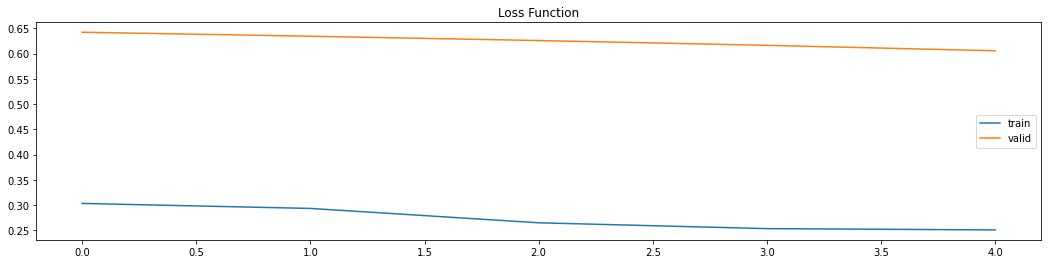

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()


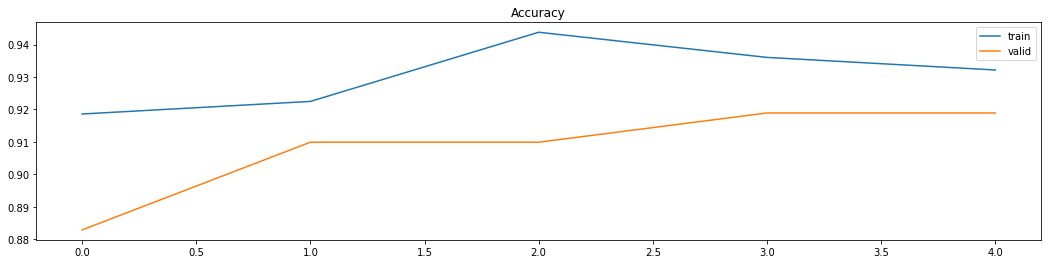

In [20]:
plt.figure(figsize=(18, 4))
plt.plot(history.history['acc'], label = 'train')
plt.plot(history.history['val_acc'], label = 'valid')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
import os
import cv2
import numpy as np
l = 0
video_folder = '/content/Normal Crowds/'
xd = []
y = []
list_of_videos = os.listdir(video_folder)
for i in range(1):
    # Video Path
    vid = str("/content/Crowd Dataset - extra/1379-7_l.mov")  # path to each video from list1 = os.listdir(path)
    # Reading the Video
    cap = cv2.VideoCapture(vid)
    # Reading Frames
    # fps = vcap.get(5)
    # To Store Frames
    q = 0
    frames = []
    if l % 1 == 0:
         print(l, "/", len(list_of_videos))

    l += 1
    while (cap.isOpened()):

        q += 1
        ret, frame = cap.read()
        if ret == False:
            break
        else:
            frame = cv2.resize(frame, (100, 100), interpolation=cv2.INTER_AREA)
            frames.append(frame)

        if q == 16:
            xd.append(frames)  # appending each tensor of 40 frames resized to 30x30
            y.append(1)  # appending a class label to the set of 40 frames
            frames = []
            q=0

In [ ]:
xd = np.array(xd)
y = np.array(y)
# 
print(xd.shape)
print(len(xd))
# 
# y = y.reshape(len(xd),2)

print(xd.shape)
print(y.shape)


xd = xd.astype('float16') / 255.

In [ ]:
# Finally Test Code on test data

score, acc = model.evaluate(xd, y,batch_size=32)
print('Test score:', score)
print('Test accuracy other data:', acc)

In [ ]:
!pwd

In [ ]:
import os
os.chdir("/content/drive/My Drive/Crowd")